# Air BNB Seattle Dataset Project by Carina Breu
## Introduction


## Research Questions

* Which kind of Appartments are offered on Airbnb for Seattle?
* Where are these appartments located?
* How do factors like beds, neighboorhood, behavior of the host affect the basic appartment price?

## Dataset Overview

The dataset Air BNB Seattle contains detailed information about 3818 airbnb listings in 2016, which range from shared rooms to complete homes and appartments. Columns range from descripitve information like name, id, summary and description over pictures, host information, listing specifications like location, accomodates, bath and bedrooms and further equipments of the appartments. Furthermore it contains also details about booking requirements and restrictions and customer reviews.
The data is subdivided into three tables namely

* listings
* calendar and 
* reviews.

The calendar table contains information about the daily price of the listings. In the review table, we can find all reviews by customers in datail. This table however is not relevant for this analysis.
The key features, which I will refer to in my analysis are stored in the listings table. To keep this overview clear, I will just introduce the columns, that are relevant for my further analysis.
These are
 * id
 * neighbourhood_group_cleansed
 * room_type
 * accommodates
 * bathrooms
 * bedrooms
 * beds
 * review_scores_value

 There are surely further characteristics that might influence the price like the property_type for example. However this criterium has very many categories. With a dataset of only 3800 rows, to many features will easily lead to ..... and therefore might lead to confusing results.

In my analysis I want to find out, which characterstics of appartments justify for higher prices.
I therefore pick out the following potentially relevant columns and will provide deeper insights about their distribution and correlation with the mean appartment price.

In [1]:
#Import Statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import requests
import json

%matplotlib inline

## Data Preparation

In [155]:
#Import Datasets (listings, calendar and reviews)
df_list=pd.read_csv('listings.csv')
df_calendar=pd.read_csv('calendar.csv')
df_reviews=pd.read_csv('reviews.csv')

### Listings Table

In [156]:
#Show first 5 rows of listings dataset
df_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [157]:
# Column and datatype infos
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Calendar Table

In [158]:
#Show first rows of Calendar dataset
df_calendar.head(20)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [159]:
#Columns and datatypes of Calendar dataset
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [160]:
# Clean df_calendar and remove currency from price column and convert to float and set date to datatype datetime
df_cal_clean=df_calendar
df_cal_clean['date']=pd.to_datetime(df_cal_clean['date'])
df_cal_clean['price_USD']=df_cal_clean['price'].str.replace('$','')
df_cal_clean['price_USD']=df_cal_clean['price_USD'].str.replace(',','')
df_cal_clean['price_USD']=df_cal_clean['price_USD'].astype('float')

# Add room_type to Calendartable
df_cal_clean=pd.merge(df_cal_clean,df_list_cleaned[['id','room_type']], left_on='listing_id',right_on='id')

# Add mean price to table df_list
df_mean_price=df_cal_clean[['listing_id','price_USD']].groupby('listing_id').mean('price_USD')
df_mean_price=df_mean_price.rename(columns={'price_USD':'mean_price'})
df_mean_price

# Add mean price to table df_list
df_list=pd.merge(df_list,df_mean_price, left_on='id',right_on='listing_id')
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 93 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3074 non-null   int64  
 1   listing_url                       3074 non-null   object 
 2   scrape_id                         3074 non-null   int64  
 3   last_scraped                      3074 non-null   object 
 4   name                              3074 non-null   object 
 5   summary                           2916 non-null   object 
 6   space                             2756 non-null   object 
 7   description                       3074 non-null   object 
 8   experiences_offered               3074 non-null   object 
 9   neighborhood_overview             2370 non-null   object 
 10  notes                             1931 non-null   object 
 11  transit                           2456 non-null   object 
 12  thumbn

## Modeling

In [53]:
# Function to create dummys for category variables
def create_dummy_df(df,cat_cols,dummy_na):
    for col in cat_cols:
        #try:
            df=pd.concat([df.drop(col,axis=1),pd.get_dummies(df[col],prefix=col,prefix_sep='_',drop_first=True,dummy_na=dummy_na)],axis=1)
        #except: continue
    return df

In [59]:
df_model_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3074 entries, 0 to 3814
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   3074 non-null   int64   
 1   room_type            3074 non-null   object  
 2   accommodates         3074 non-null   int64   
 3   bathrooms            3074 non-null   float64 
 4   bedrooms             3074 non-null   float64 
 5   beds                 3074 non-null   float64 
 6   number_of_reviews    3074 non-null   int64   
 7   review_scores_value  3074 non-null   float64 
 8   nhg                  3074 non-null   category
 9   mean_price           3074 non-null   float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 243.8+ KB


In [60]:
#Create a Linear Regression Model for the mean price of an airbnb listing

df_list_cleaned=df_list[['id','room_type','accommodates','bathrooms','bedrooms','beds','number_of_reviews','review_scores_value','neighbourhood_group_cleansed','mean_price']]

#Rename column 'neighbourhood_group_cleansed' to nhg (neighbourhood group) to make plot labels shorter
df_list_cleaned=df_list_cleaned.rename(columns={'neighbourhood_group_cleansed':'nhg'})
nhgs=list(df_list_cleaned['nhg'].value_counts().index)
nhgs.remove('Other neighborhoods')
nhgs.append('Other neighborhoods')
nh_groups=pd.CategoricalDtype(ordered=True, categories=nhgs)
df_list_cleaned['nhg']=df_list_cleaned['nhg'].astype(nh_groups)



df_model_price=df_list_cleaned

#Drop the rows without a mean price
df_model_price.dropna(subset=['mean_price'],axis=0, inplace=True)

#I drop all rows, where no rating is available yet, since this is a sign, that the object has not been rented before and the price may be too high and therefore nobody rents the space. 
df_model_price.dropna(inplace=True)

#Extract category columns
cat_cols=list(df_model_price.select_dtypes(include=['object','category']).columns)

df_model_price


,id,room_type,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_value,nhg,mean_price
0,241032,Entire home/apt,4,1.0,1.0,1.0,207,10.0,Queen Anne,85.000000
1,953595,Entire home/apt,4,1.0,1.0,1.0,43,10.0,Queen Anne,170.931271
2,3308979,Entire home/apt,11,4.5,5.0,7.0,20,10.0,Queen Anne,1301.818182
4,278830,Entire home/apt,6,2.0,3.0,3.0,38,9.0,Queen Anne,462.739726
5,5956968,Private room,2,1.0,1.0,1.0,17,10.0,Queen Anne,125.629139
...,...,...,...,...,...,...,...,...,...,...
3810,262764,Entire home/apt,5,1.0,2.0,3.0,5,8.0,Other neighborhoods,191.651982
3811,8578490,Entire home/apt,3,1.0,1.0,1.0,2,10.0,Other neighborhoods,67.782805
3812,3383329,Entire home/apt,4,1.0,1.0,2.0,73,10.0,Other neighborhoods,102.818815
3813,8101950,Entire home/apt,6,2.0,3.0,3.0,1,8.0,Other neighborhoods,359.000000


In [61]:
#Create Dummy Variables for Category Variables
df_model_price=create_dummy_df(df_model_price,cat_cols,True)

#Show table df_model_price with dummy columns
df_model_price.head()


,id,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_value,mean_price,room_type_Private room,room_type_Shared room,...,nhg_Beacon Hill,nhg_Cascade,nhg_Northgate,nhg_Delridge,nhg_Lake City,nhg_Magnolia,nhg_Seward Park,nhg_Interbay,nhg_Other neighborhoods,nhg_nan
0,241032,4,1.0,1.0,1.0,207,10.0,85.000000,False,False,...,False,False,False,False,False,False,False,False,False,False
1,953595,4,1.0,1.0,1.0,43,10.0,170.931271,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3308979,11,4.5,5.0,7.0,20,10.0,1301.818182,False,False,...,False,False,False,False,False,False,False,False,False,False
4,278830,6,2.0,3.0,3.0,38,9.0,462.739726,False,False,...,False,False,False,False,False,False,False,False,False,False
5,5956968,2,1.0,1.0,1.0,17,10.0,125.629139,True,False,...,False,False,False,False,False,False,False,False,False,False


In [118]:
#Solit into explanatory and response variables
X=df_model_price.drop(['mean_price','id'],axis=1)
y=df_model_price['mean_price']

#Split into train and test
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)
#Instantiate
lm_model= LinearRegression()
#Fit
lm_model.fit(X_train,y_train)

#Predict using the model
y_test_preds=lm_model.predict(X_test)
y_train_preds=lm_model.predict(X_train)

#Score the Model
test_score=r2_score(y_test,y_test_preds)
train_score=r2_score(y_train,y_train_preds)

print(f'R2 Score of the Test Data: {test_score}, and R2 Score of the Train data: {train_score}')


R2 Score of the Test Data: 0.6643628621118737, and R2 Score of the Train data: 0.6262850669282465


<Axes: xlabel='est_int'>

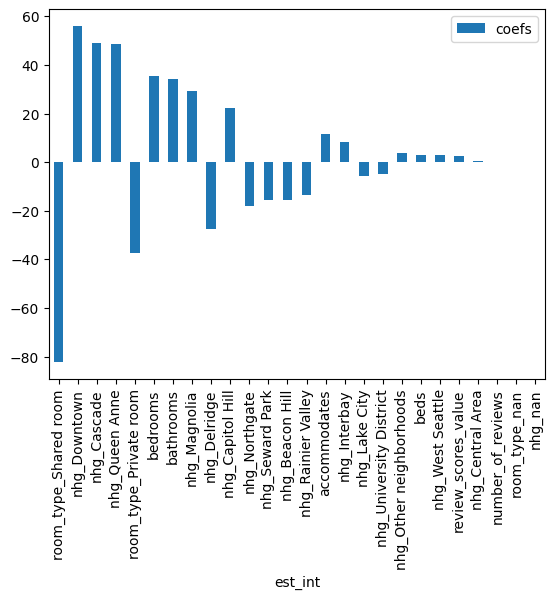

In [37]:
# Show coefficients of Linear Regression
def coef_weights(coefficients,X_train):
    ''' The function coef_weights returns a dataframe of coeficients from the Linear Regression ordered by their absolute value.'''
    coefs_df=pd.DataFrame()
    coefs_df['est_int']=X_train.columns
    coefs_df['coefs']=lm_model.coef_
    coefs_df['abs_coefs']=np.abs(lm_model.coef_)
    coefs_df=coefs_df.sort_values('abs_coefs',ascending=False)
    return coefs_df

#Dataset with coefficients from Linear Regression
coef_df=coef_weights(lm_model.coef_,X_train)
#Plot Coeffincients from Linear Regression
coef_df[['est_int','coefs']].plot(kind='bar', y='coefs', x='est_int')


In [119]:
X_test.head()

,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_value,room_type_Private room,room_type_Shared room,room_type_nan,nhg_Downtown,...,nhg_Beacon Hill,nhg_Cascade,nhg_Northgate,nhg_Delridge,nhg_Lake City,nhg_Magnolia,nhg_Seward Park,nhg_Interbay,nhg_Other neighborhoods,nhg_nan
3349,6,2.0,3.0,3.0,4,10.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2519,6,2.0,3.0,3.0,9,10.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3132,3,1.0,2.0,2.0,23,9.0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
232,2,1.5,1.0,1.0,23,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287,2,2.0,1.0,1.0,13,10.0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Evaluation

### Which kind of Appartments are offered on Airbnb for Seattle?

Text(0, 0.5, 'Number of Listings')

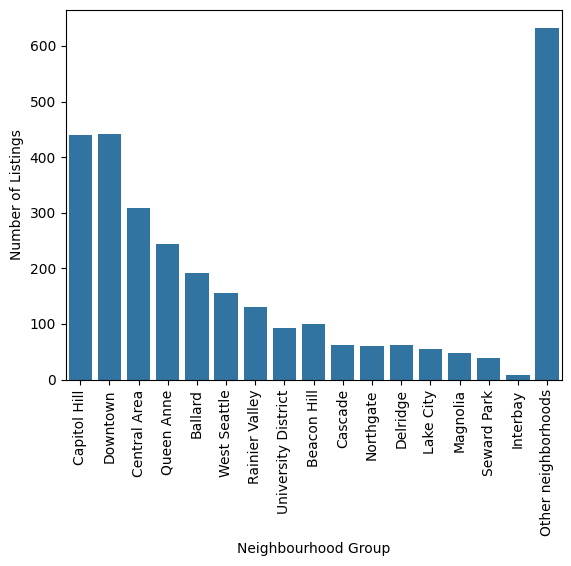

In [161]:
#Neighboorhood Countplot
sns.countplot(data=df_list_cleaned, x='nhg')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')


Text(0.5, 1.0, 'Mean Listing Price after Neighboorhood Group and Room Type')

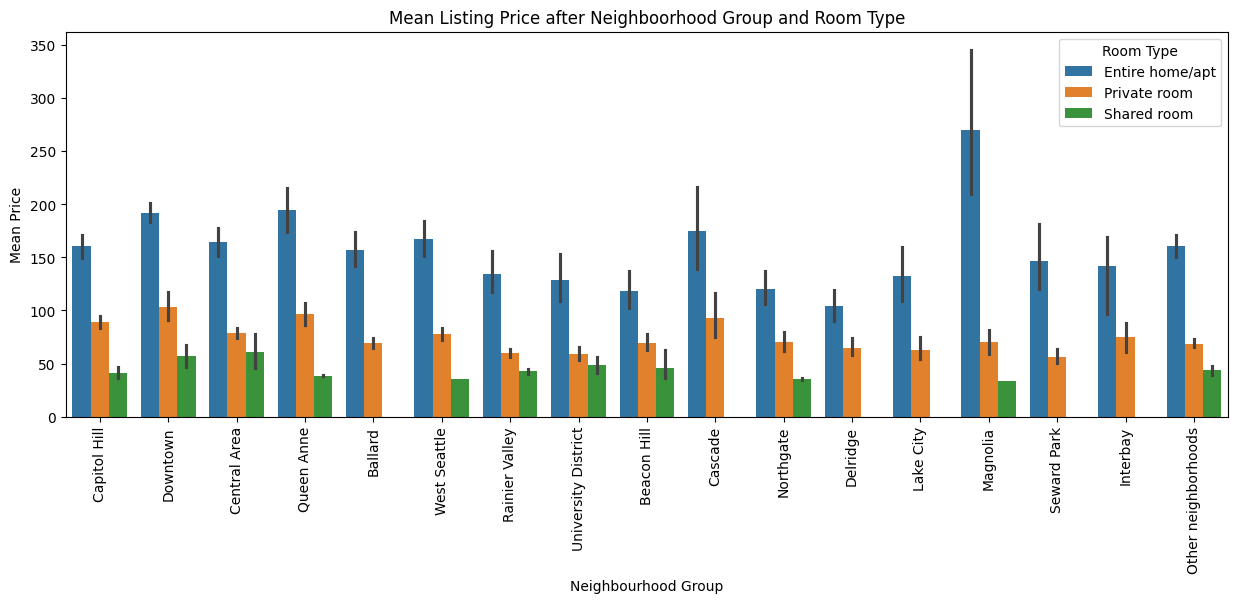

In [162]:
#Neighboorhood Price
fig=plt.figure(figsize=(15,5))
sns.barplot(data=df_list_cleaned, x='nhg',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Neighboorhood Group and Room Type')

Text(0.5, 1.0, 'Number of Listings after Room Type')

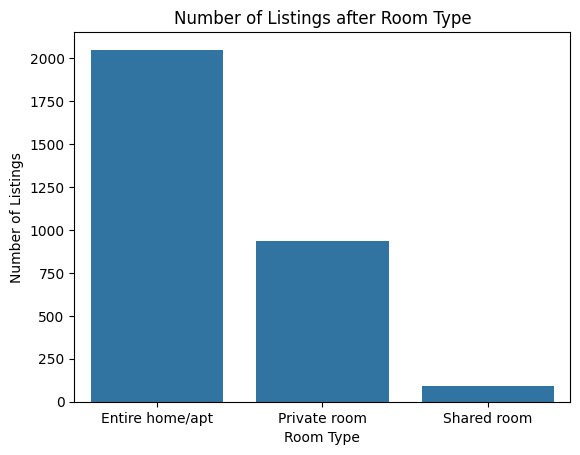

In [163]:
#Room Type
#Neighboorhood Countplot
sns.countplot(data=df_list_cleaned, x='room_type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Room Type')

Text(0.5, 1.0, 'Number of Listings after Bedrooms')

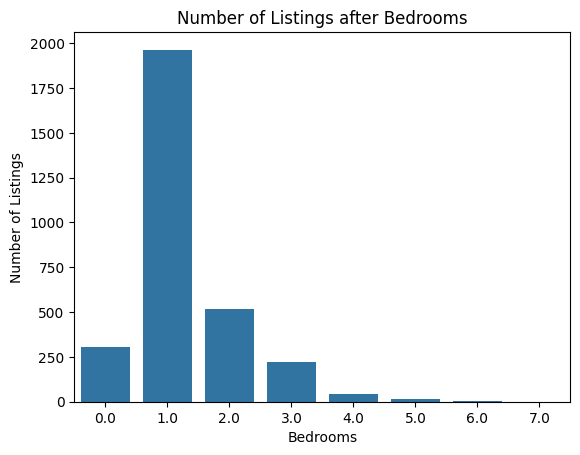

In [164]:
#Room Type
#Bedroom Countplot
sns.countplot(data=df_list_cleaned, x='bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Bedrooms')

(0.0, 800.0)

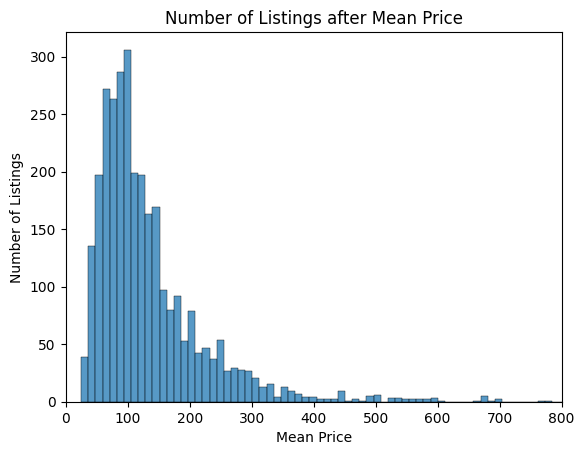

In [165]:
#Mean Price
#Bedroom Countplot
sns.histplot(data=df_list_cleaned, x='mean_price')
plt.xlabel('Mean Price')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Mean Price')
plt.xlim(0,800)

Text(0.5, 1.0, 'Number of Listings after Review Scores')

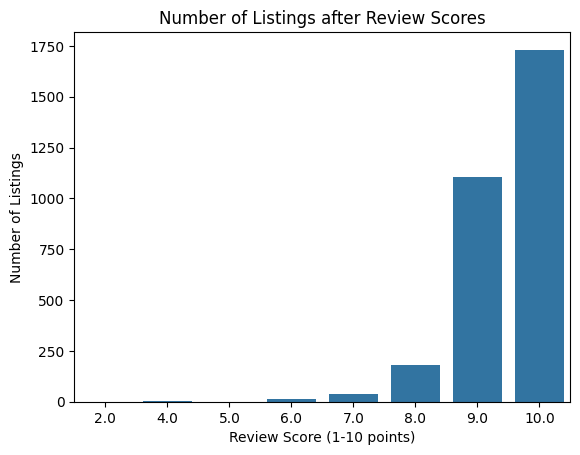

In [166]:
#Review Scores
#Rating Countplot
sns.countplot(data=df_list_cleaned, x='review_scores_value')
plt.xlabel('Review Score (1-10 points)')
plt.ylabel('Number of Listings')
plt.title('Number of Listings after Review Scores')

Text(0.5, 1.0, 'Mean Listing Price after Review Scores and Room Type')

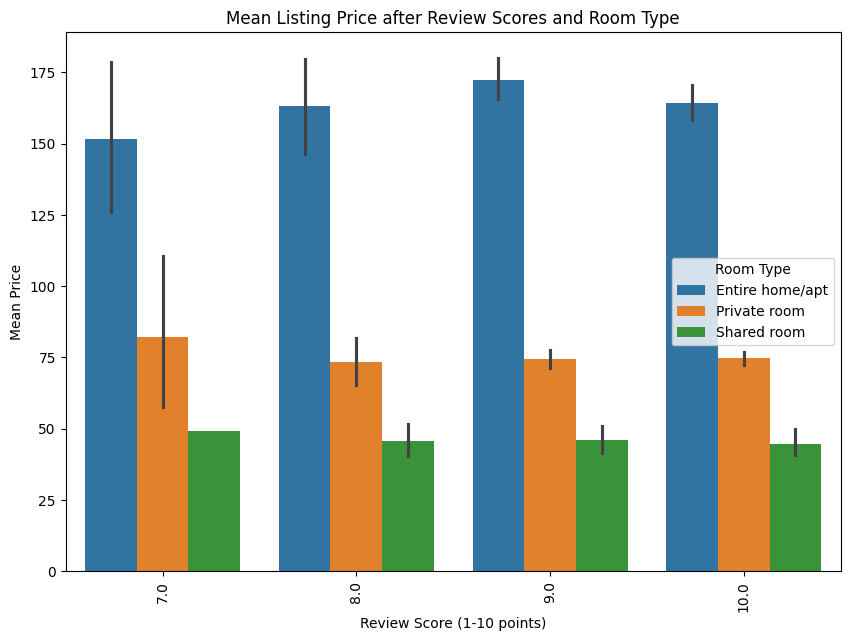

In [167]:
#Neighboorhood Price
fig=plt.figure(figsize=(10,7))
sns.barplot(data=df_list_cleaned[df_list_cleaned['review_scores_value']>6], x='review_scores_value',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Review Score (1-10 points)')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Review Scores and Room Type')

Text(0.5, 1.0, 'Mean Listing Price after Review Scores and Room Type')

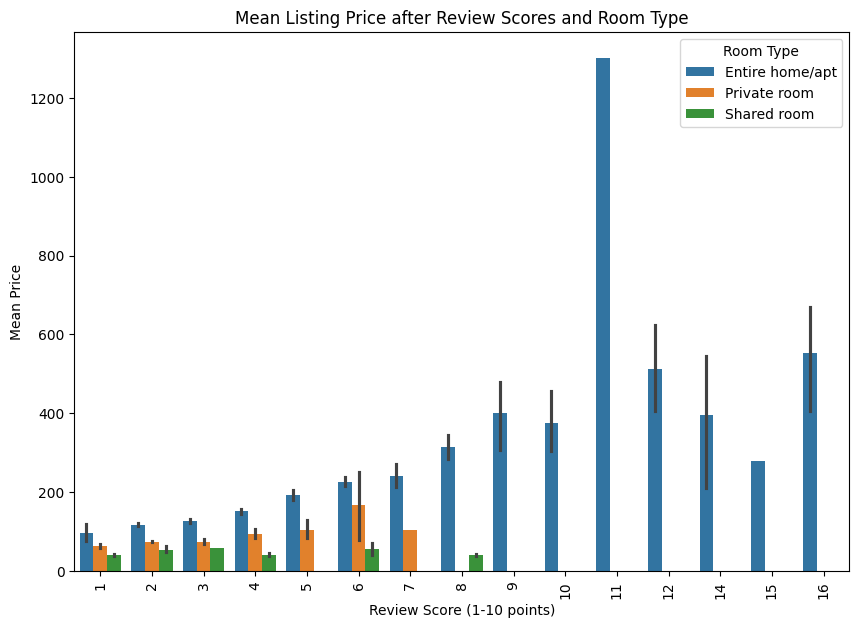

In [168]:
#Neighboorhood Price
fig=plt.figure(figsize=(10,7))
sns.barplot(data=df_list_cleaned, x='accommodates',y='mean_price', hue='room_type')
plt.xticks(rotation=90)
plt.xlabel('Review Score (1-10 points)')
plt.ylabel('Mean Price')
plt.legend(title='Room Type')
plt.title('Mean Listing Price after Review Scores and Room Type')

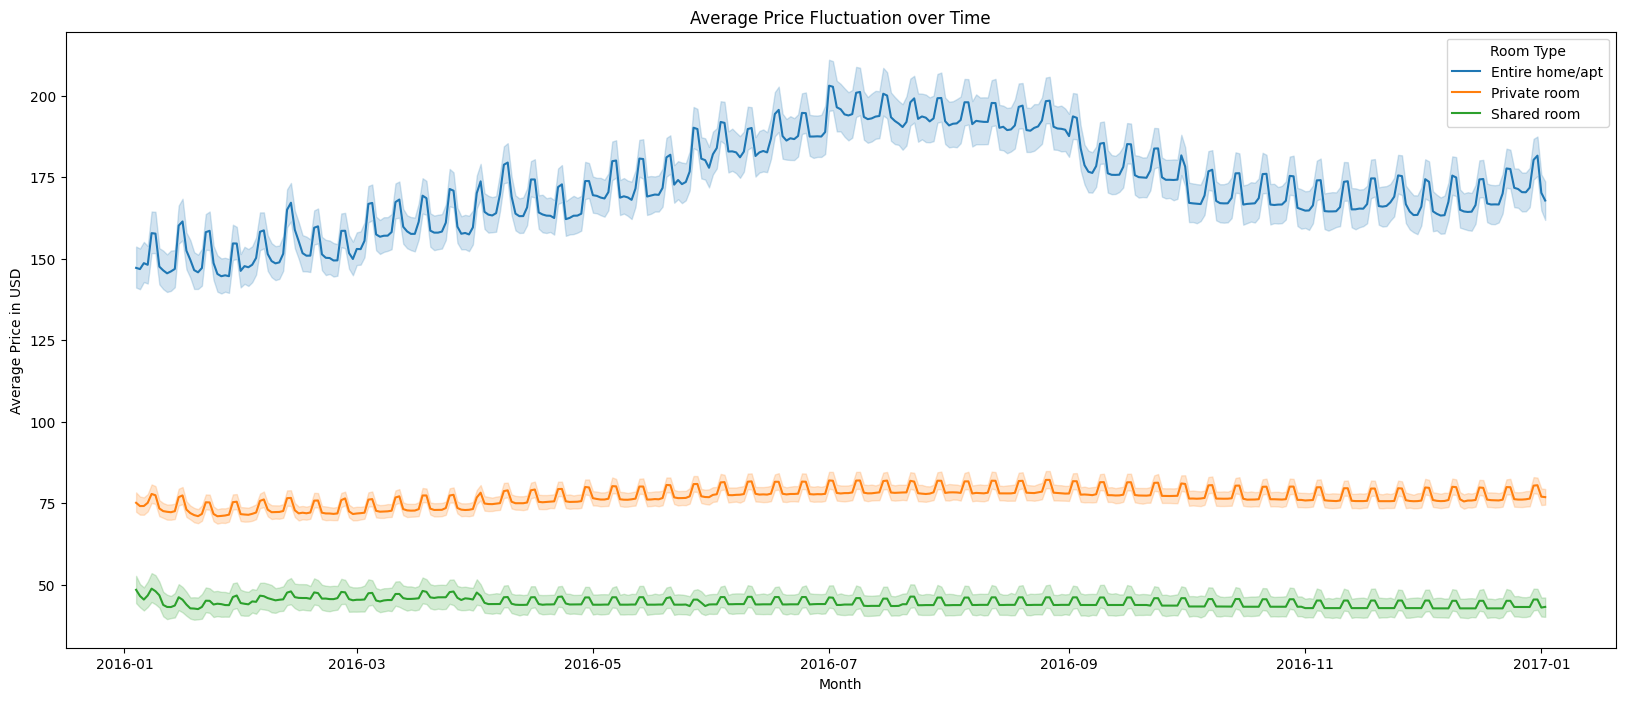

In [170]:
# Lineplot Average Price over Time according to Room Type
fig=plt.figure(figsize=(20,8))
sns.lineplot(data=df_cal_clean, x='date', y='price_USD', hue='room_type')
plt.xlabel('Month')
plt.ylabel('Average Price (in USD)')
plt.title('Average Price Fluctuation over Time')
plt.legend(title='Room Type')

In [ ]:
## Deployment

## Offer your accomodation on Airbnb? Or 
This article will help you to screen the airbnb market in Seattle and find the perfect price for your offer!

 
Have you ever asked yourself, how to save money ?

When I search for my future holiday accomodations, I always begin by entering the number of persons and a downside rating threshold. 
Which are th most important accomodation characteristics for you and are they accompanied by a higher listing price?
I often asked myself, if all people decide upon reviews and if a positive review is linked to a higher price.

But is this the way, how all people evaluate holiday accomodations? How are prices linked to factors like reviews?

If this would be the case, the price would likely to increase with positive reviews ?

* Price drivers for airbnb accomodations in Seattle?
    * Room Type
    * Location
    * Time (Weekend and Seasonal Fluctuation)
* Where are these appartments located?
* How do factors like beds, neighboorhood, behavior of the host affect the basic appartment price?

###Conclusion